### Importing 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

### Load and Exploration of the Data

In [3]:
data=pd.read_csv("gld_price_data.csv")
data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [4]:
data.shape

(2290, 6)

In [5]:
data.columns

Index(['Date', 'SPX', 'GLD', 'USO', 'SLV', 'EUR/USD'], dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [7]:
data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


### Check for null values & perform Data Cleaning

In [8]:
data=data.drop("Date",axis=1)

In [9]:
data.head(10).style.background_gradient(cmap='Purples')

,SPX,GLD,USO,SLV,EUR/USD
0,1447.160034,84.860001,78.470001,15.180000,1.471692
1,1447.160034,85.570000,78.370003,15.285000,1.474491
2,1411.630005,85.129997,77.309998,15.167000,1.475492
3,1416.180054,84.769997,75.500000,15.053000,1.468299
4,1390.189941,86.779999,76.059998,15.590000,1.557099
5,1409.130005,86.550003,75.250000,15.520000,1.466405
6,1420.329956,88.250000,74.019997,16.061001,1.480100
7,1401.020020,88.580002,73.089996,16.077000,1.479006
8,1416.250000,89.540001,74.250000,16.280001,1.486900
9,1380.949951,87.989998,72.779999,15.834000,1.480210


In [10]:
data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [11]:
#checking null values
data.isnull().sum()

SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [12]:
#checking if there are any duplicate values
data.duplicated().sum()

0

### Check Features Correlation

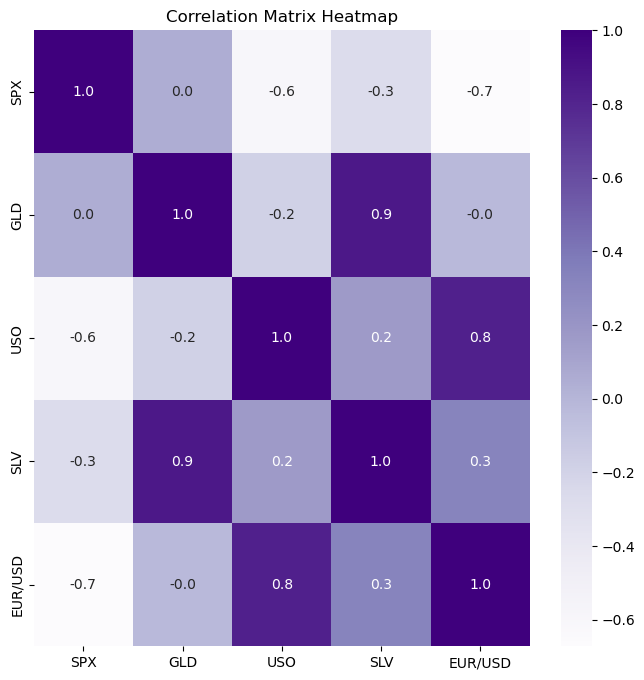

In [13]:
plt.figure(figsize=(8,8))
sns.heatmap(data.corr(), annot=True, cmap='Purples',fmt='1.1f')
plt.title("Correlation Matrix Heatmap")
plt.show()

In [14]:
print (data.corr()['GLD'].sort_values(ascending=False), '\n')

GLD        1.000000
SLV        0.866632
SPX        0.049345
EUR/USD   -0.024375
USO       -0.186360
Name: GLD, dtype: float64 



###  Data Visualisation

Skewness: %f 0.3341383472692508
Kurtosis: -0.275081


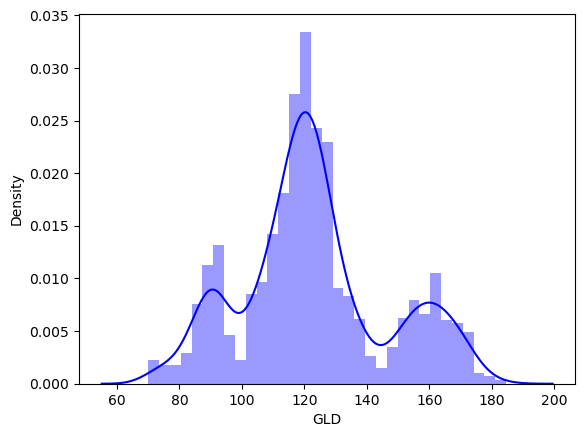

In [15]:
#target variable
sns.distplot(data['GLD'], color = 'blue')
print('Skewness: %f', data['GLD'].skew())
print("Kurtosis: %f" % data['GLD'].kurt())

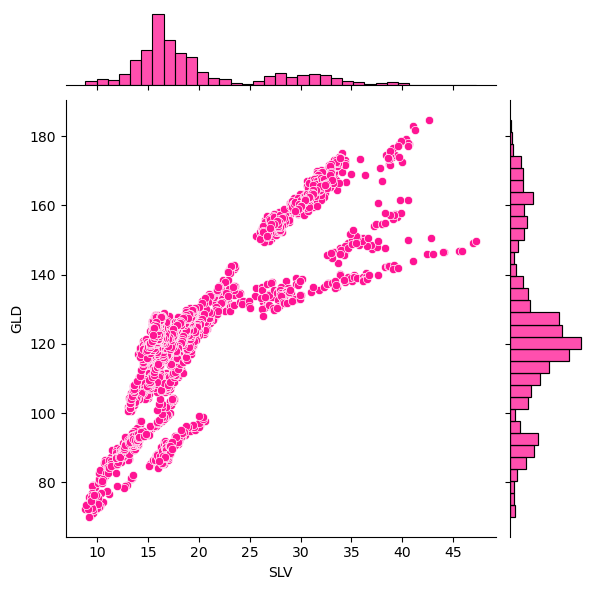

In [16]:
#the relation with GLD variable
sns.jointplot(x =data['SLV'], y = data['GLD'], color = 'deeppink')

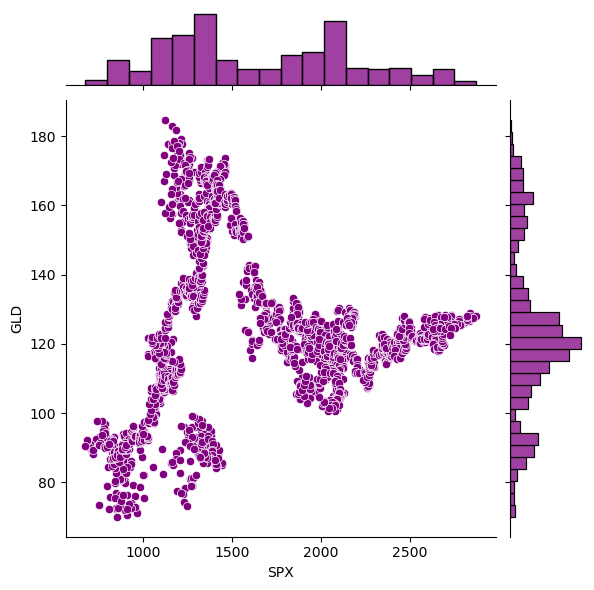

In [17]:
#the relation with GLD variable
sns.jointplot(x =data['SPX'], y = data['GLD'], color = 'purple')

### Extract Features (X) and Labels (Y) from Data

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
#Independent Variable (X) & Dependent Variable (Y)
x=data.drop('EUR/USD',axis=1)
y=data['EUR/USD']

In [20]:
x.shape,y.shape

((2290, 4), (2290,))

In [21]:
#Split the dataset for train and test
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [22]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((1832, 4), (458, 4), (1832,), (458,))

### Training the model with Random forest regression

In [23]:
from sklearn.ensemble import RandomForestRegressor

In [24]:
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
regressor.fit(x_train, y_train)

RandomForestRegressor(random_state=0)

### Prediction of the model

In [25]:
y_pred = regressor.predict(x_test)

In [26]:
print(y_pred)

[1.35261547 1.13356793 1.41577347 1.36259221 1.56399548 1.28038219
 1.0564456  1.34199815 1.30066811 1.0946952  1.07529498 1.10933917
 1.39566203 1.2818015  1.16985142 1.18181628 1.31523435 1.39351865
 1.57995057 1.37258834 1.44357716 1.13080619 1.3583003  1.4130711
 1.39259634 1.41089464 1.1181794  1.3138719  1.29819568 1.12023336
 1.04919425 1.08913727 1.37596622 1.15360059 1.46351221 1.35460692
 1.43545361 1.10748638 1.23718939 1.41570379 1.49039415 1.35813409
 1.35030707 1.31234763 1.36082409 1.42806869 1.17895445 1.34783764
 1.34851756 1.23593627 1.31308926 1.31314381 1.38064671 1.2418484
 1.22409815 1.27896262 1.10262396 1.54888428 1.23725201 1.07618145
 1.49076732 1.17618534 1.36319751 1.45872943 1.37853561 1.34960659
 1.21914415 1.24653403 1.31632165 1.16862968 1.22825074 1.41778124
 1.2759962  1.35654605 1.26347451 1.1110944  1.2337497  1.04337516
 1.09436233 1.31928702 1.35938184 1.33945152 1.23776017 1.36725708
 1.39668471 1.31093423 1.09473354 1.11993023 1.33764464 1.540289

In [27]:
def predict(SPX=0,GLD=0,USO=0,SLV=0):
    x=np.array([SPX,GLD,USO,SLV]).reshape(-1,4)
    price=regressor.predict(x)
    return price

In [28]:
x_test[2:][:1]

,SPX,GLD,USO,SLV
711,1309.660034,139.220001,42.049999,36.119999


In [29]:
y_test[2:][:1]

711    1.410596
Name: EUR/USD, dtype: float64

In [30]:
y_prediction=predict(1309.660034,139.220001,42.049999,36.119999)
print(y_prediction)

[1.41577347]


### Checking the error for regression

In [31]:
from sklearn import metrics

In [33]:
print('mean_absolute_error :', metrics.mean_absolute_error(y_test,y_pred))
print('mean_squared_error :', metrics.mean_squared_error(y_test,y_pred))
print('root_mean_squared_error :', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

mean_absolute_error : 0.011853381113537117
mean_squared_error : 0.0003323523646509436
root_mean_squared_error : 0.018230533855346738


###  Accuracy of Training and Testing Set

In [34]:
accuracy_train = regressor.score(x_train, y_train)
accuracy_test = regressor.score(x_test, y_test)
print("accuracy_train :",accuracy_train)
print("accuracy_test :",accuracy_test)

accuracy_train : 0.9972777088606456
accuracy_test : 0.979243070355382
